In [1]:
import ils.cfsdp as cfs
import ils.utils as ut
from sklearn.metrics.pairwise import pairwise_distances
import time
import warnings
warnings.filterwarnings("ignore")

In [2]:
X = ut.synthetic_data()
X[0]

,x,y
ID,,
0,-0.777845,-0.075338
1,-1.742539,0.742948
2,-0.222690,-0.820667
3,1.010078,-0.321991
4,0.103585,-0.897555
...,...,...
1495,0.410347,-0.819713
1496,0.505229,0.682707
1497,-0.460780,-0.776318


In [3]:
def pre_calculate(data):
    start = time.time()
    distance_matrix = pairwise_distances(data)
    dc, dc_value_list, field = cfs.choose_dc(distance_matrix)
    print(dc)
    density = cfs.continuous_density(distance_matrix, dc)
    delta_matrix = cfs.delta_function(distance_matrix, density) 
    scores = cfs.choosing_centernumber(density, delta_matrix)
    end = time.time()
    print('Density caluation time {}'.format(end-start))
    return scores, density, delta_matrix

In [4]:
def combine_clustering(data, scores, k):
    index = cfs.top_k_idx(scores, k)
    newL, count = cfs.applyILS(data, index)
    return newL, count, index

In [5]:
def test_cfsdp(data, k):
    scores, density, delta_matrix = pre_calculate(data)
    cfs.plot_center(delta_matrix, density, scores)
    cfs.density_delta(density, delta_matrix, data)
    newL, count, index = combine_clustering(data, scores, k)
    cfs.draw_ILS(count, data, newL, ut.colors)
    cfs.plot_centroid(data, index)

In [6]:
scores, density, delta_matrix = pre_calculate(X[0])

0.12856486930664499
Density caluation time 3.119346857070923


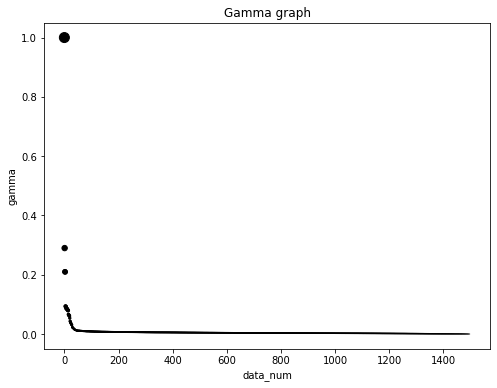

In [7]:
cfs.plot_center(delta_matrix, density, scores)


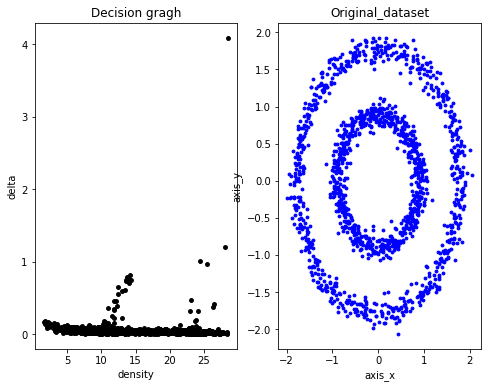

In [8]:
cfs.density_delta(density, delta_matrix, X[0])

In [9]:
newL, count, index = combine_clustering(X[0], scores, 2)

The number of clusters: 2
Iterative label spreading took 18.9s


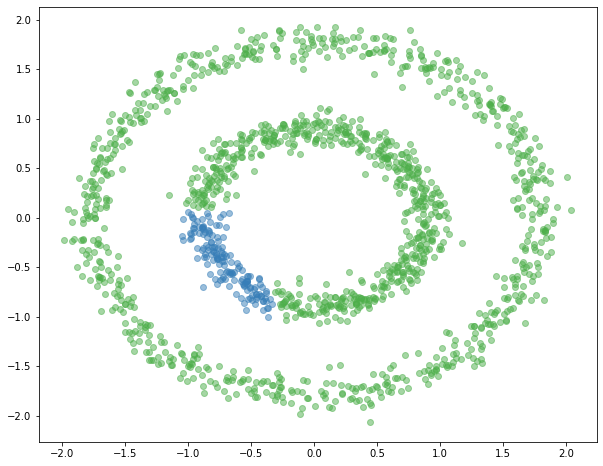

In [10]:
cfs.draw_ILS(count, X[0], newL, ut.colors)

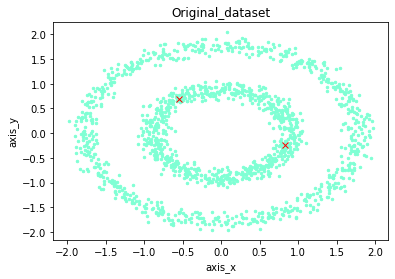

In [11]:
cfs.plot_centroid(X[0], index)

0.08570991287109667
Density caluation time 3.0595500469207764


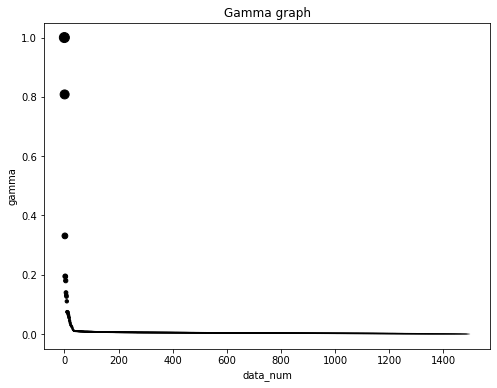

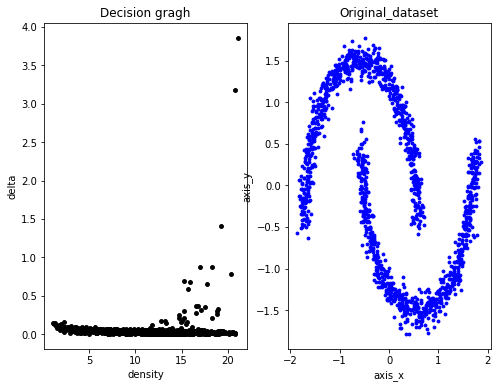

The number of clusters: 2
Iterative label spreading took 22.7s


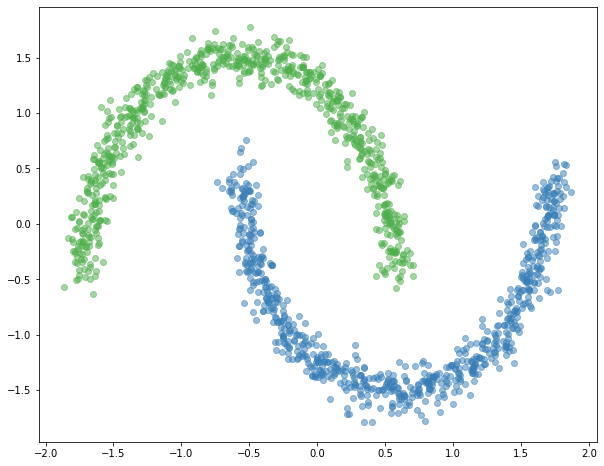

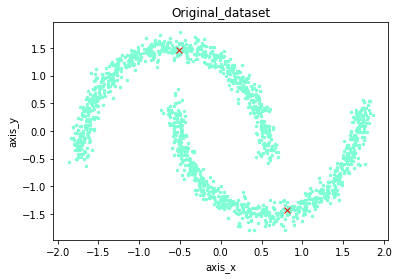

In [12]:
test_cfsdp(X[1],2)

0.17141982574219333
Density caluation time 3.112240791320801


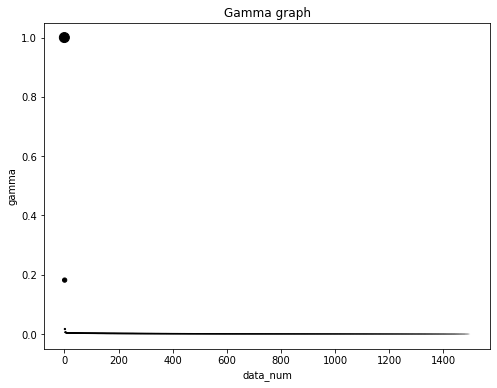

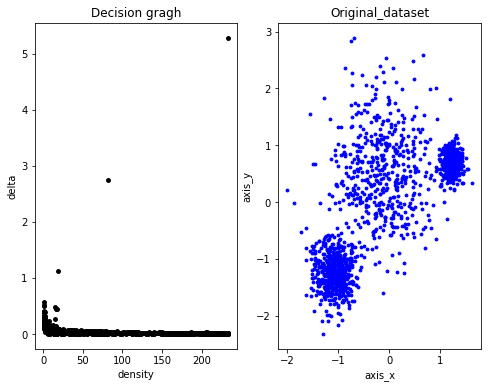

The number of clusters: 3
Iterative label spreading took 23.7s


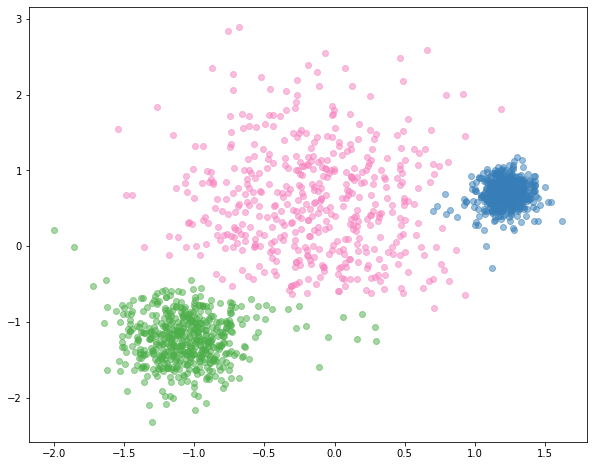

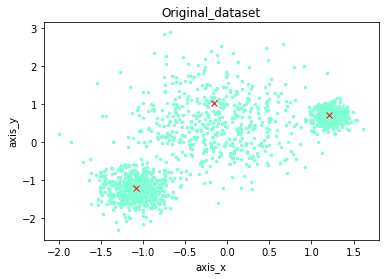

In [17]:
test_cfsdp(X[2],3)

0.14999234752441917
Density caluation time 3.100472927093506


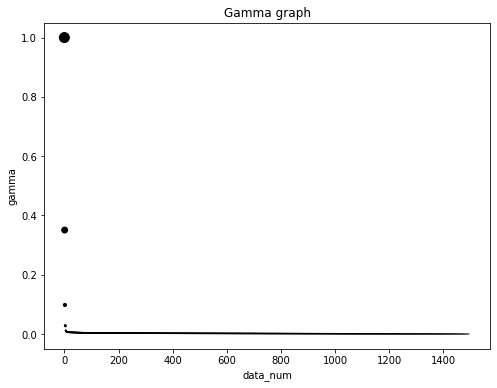

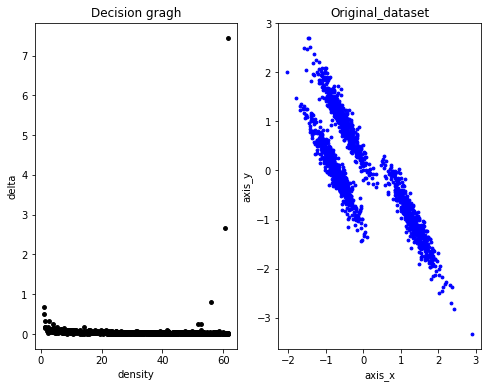

The number of clusters: 3
Iterative label spreading took 23.5s


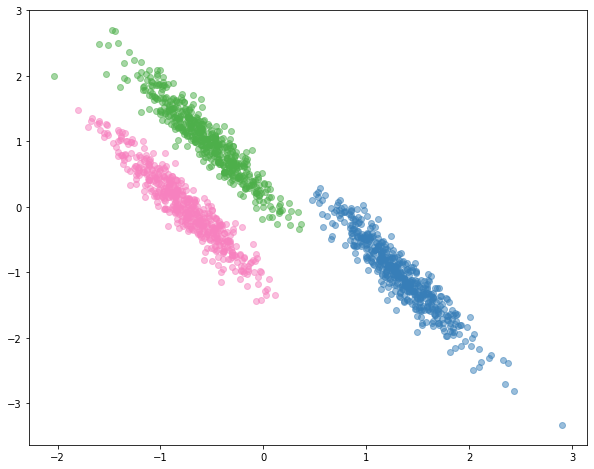

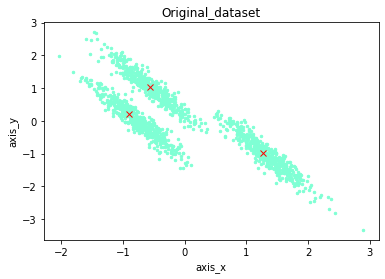

In [18]:
test_cfsdp(X[3],3)

0.12856486930664499
Density caluation time 3.5759191513061523


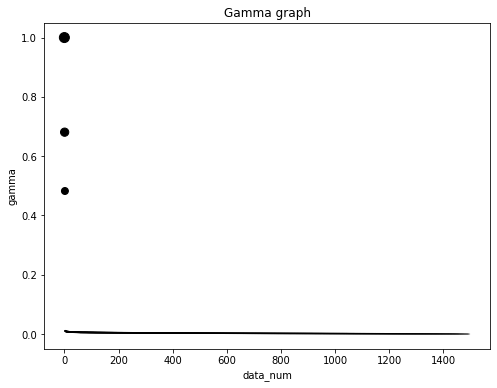

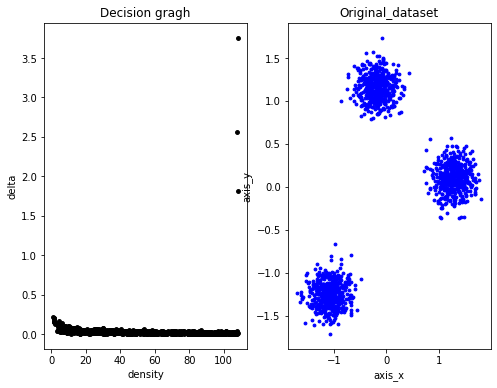

The number of clusters: 3
Iterative label spreading took 24.1s


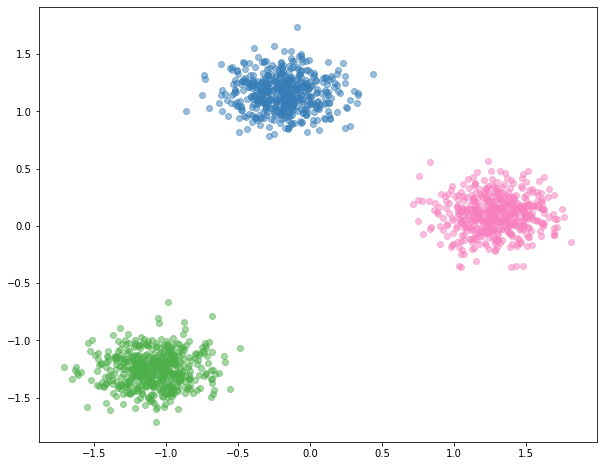

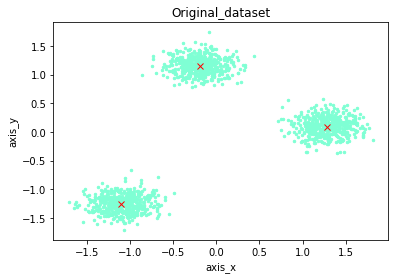

In [19]:
test_cfsdp(X[4],3)